In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
EXPORT_DIR = "exports_step1_creditmetrics_csv"
Z_hat = pd.read_csv(f"{EXPORT_DIR}/Z_hat_econ_group_quarterly.csv")

In [3]:
# Charger le fichier Excel
df_macro_raw= pd.read_excel("data\macro_data\Données_macro_hist_v2.xlsx")

# Afficher les premières lignes
df_macro_raw

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\HP\AppData\Local\Temp\ipykernel_13576\1487460906.py:2: SyntaxWarning: invalid escape sequence '\m'
  df_macro_raw= pd.read_excel("data\macro_data\Données_macro_hist_v2.xlsx")


,Region,Variable,Unit,2010-Q1,2010-Q2,2010-Q3,2010-Q4,2011-Q1,2011-Q2,2011-Q3,...,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3,2024-Q4,2025-Q1
0,Argentina,Central bank Intervention rate (policy interes...,%,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,9.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,Effective exchange rate,index; 2017=100,180.006667,182.946667,181.750000,177.056667,174.323333,167.796667,169.263333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,Exchange_rate,local currency per US$,3.830000,3.880000,3.920000,3.950000,3.990000,4.060000,4.150000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,GDP Growth Rate,%,3.131891,4.307855,0.557817,1.184901,2.388622,1.192061,0.842933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,Central bank Intervention rate (policy interes...,%,3.833333,4.416667,4.500000,4.666667,4.750000,4.750000,4.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,United States,Inflation rate,%,2.360525,1.767765,1.175609,1.270248,2.141127,3.430395,3.756174,...,7.103384,5.810245,3.982369,3.514197,3.243513,3.240480,3.199263,2.622039,2.745114,2.737586
247,United States,Long term interest rate,%,3.716667,3.490000,2.786667,2.863333,3.460000,3.210000,2.426667,...,3.830000,3.646667,3.593333,4.150000,4.440000,4.160000,4.443333,3.946667,4.283333,4.453333
248,United States,Oil price,US$ per barrel,76.674837,78.845036,76.675000,87.033160,105.369424,117.541905,113.266948,...,88.720130,82.323613,78.086130,85.983547,82.891681,81.955714,84.981986,78.708317,74.000940,75.042781
249,United States,Unemployment rate,%,9.833333,9.633333,9.466666,9.500000,9.033334,9.066667,9.000000,...,3.566667,3.533333,3.533333,3.666667,3.800000,3.833333,4.000000,4.166667,4.133333,4.100000


In [4]:
df = df_macro_raw.copy()

id_cols = ["Region", "Variable", "Unit"]
value_cols = [c for c in df.columns if c not in id_cols]

df_long = df.melt(
    id_vars=id_cols,
    value_vars=value_cols,
    var_name="quarter",
    value_name="value"
)

df_long.head()

,Region,Variable,Unit,quarter,value
0,Argentina,Central bank Intervention rate (policy interes...,%,2010-Q1,9.500000
1,Argentina,Effective exchange rate,index; 2017=100,2010-Q1,180.006667
2,Argentina,Exchange_rate,local currency per US$,2010-Q1,3.830000
3,Argentina,GDP Growth Rate,%,2010-Q1,3.131891
4,Australia,Central bank Intervention rate (policy interes...,%,2010-Q1,3.833333


In [5]:
Z_hat

,date_q,econ_group,Z_group
0,2011-04-01,Autres,-0.058740
1,2011-07-01,Autres,-0.058740
2,2011-10-01,Autres,-0.058740
3,2012-01-01,Autres,-0.086835
4,2012-04-01,Autres,0.708281
...,...,...,...
469,2023-01-01,Transport & info-com,-0.139967
470,2023-04-01,Transport & info-com,0.120377
471,2023-07-01,Transport & info-com,0.206857
472,2023-10-01,Transport & info-com,0.120646


Nous allons récupérer les variables macroéconomiques à considérer pour la modélisation des facteurs systémiques. D'abord, au regard des données dont nous disposons, nous ne pouvons considérer que les variables provenant des régions d'EUrope (5 variables disponibles) et des US (9 variables disponibles).

In [ ]:
# Sélection des régions
regions_keep = ["Europe", "United States"]
df = df_macro_raw[df_macro_raw["Region"].isin(regions_keep)].copy()

In [8]:
# Colonnes temporelles
time_cols = [c for c in df.columns if "-" in c]
# On garde uniquement les lignes sans NaN sur toute la période
df = df.dropna(subset=time_cols)

In [9]:
# Mapping régions → suffixes
region_map = {
    "Europe": "EU",
    "United States": "US"
}

def clean_var_name(var):
    return (
        var.strip()
           .replace(" ", "_")
           .replace("(", "")
           .replace(")", "")
           .replace("/", "_")
    )

df["var_name"] = (
    df["Region"].map(region_map)
    + "_"
    + df["Variable"].apply(clean_var_name)
)

In [10]:
# Passage au format long
df_long = df.melt(
    id_vars=["var_name"],
    value_vars=time_cols,
    var_name="date",
    value_name="value"
)

# Pivot final
df_ts = df_long.pivot(
    index="date",
    columns="var_name",
    values="value"
).sort_index()

In [11]:
# Conversion "2010-Q1" → PeriodIndex trimestriel
df_ts.index = pd.PeriodIndex(df_ts.index, freq="Q").to_timestamp()

In [12]:
df_ts

var_name,EU_Central_bank_Intervention_rate_policy_interest_rate,EU_Effective_exchange_rate,EU_GDP_Growth_Rate,EU_Long_term_interest_rate,EU_Unemployment_rate,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,US_Inflation_rate,US_Long_term_interest_rate,US_Oil_price,US_Unemployment_rate
date,,,,,,,,,,,,,,
2010-01-01,1.000000,98.210000,0.357380,4.064402,10.100000,0.125000,84.740000,46.875171,0.484501,94.481014,2.360525,3.716667,76.674837,9.833333
2010-04-01,1.000000,92.703333,0.999191,3.841593,10.133330,0.125000,86.106667,41.314746,0.967586,93.876843,1.767765,3.490000,78.845036,9.633333
2010-07-01,1.000000,92.316667,0.478303,3.514643,10.033330,0.125000,84.923333,45.743602,0.771085,92.137491,1.175609,2.786667,76.675000,9.466666
2010-10-01,1.000000,94.203333,0.612048,3.707037,10.033330,0.125000,81.390000,50.410959,0.525110,90.641295,1.270248,2.863333,87.033160,9.500000
2011-01-01,1.000000,93.723333,0.961402,4.302840,9.933333,0.125000,80.343333,53.144269,-0.237205,87.908116,2.141127,3.460000,105.369424,9.033334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,4.500000,105.000000,0.300445,2.961033,6.066667,5.375000,107.953333,210.614185,0.404802,153.875453,3.240480,4.160000,81.955714,3.833333
2024-04-01,4.416667,105.403333,0.298976,3.120024,6.000000,5.375000,110.086667,218.876649,0.738980,154.462696,3.199263,4.443333,84.981986,4.000000
2024-07-01,4.000000,106.206667,0.386361,2.951025,5.933333,5.208333,109.493333,230.981949,0.759510,155.181924,2.622039,3.946667,78.708317,4.166667


In [13]:
df_ts.describe()

var_name,EU_Central_bank_Intervention_rate_policy_interest_rate,EU_Effective_exchange_rate,EU_GDP_Growth_Rate,EU_Long_term_interest_rate,EU_Unemployment_rate,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,US_Inflation_rate,US_Long_term_interest_rate,US_Oil_price,US_Unemployment_rate
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.861202,96.704044,0.376406,2.041311,8.504918,1.302596,94.734809,112.171217,0.594635,115.285646,2.585943,2.532678,78.335751,5.769399
std,1.345468,4.710978,2.063971,1.329715,1.979682,1.767798,9.969892,53.661587,1.524271,23.970174,1.942000,0.947719,23.710626,2.225320
min,0.000000,87.436667,-10.754264,-0.048785,5.833333,0.125000,78.926667,41.314746,-7.908965,85.850160,-0.062696,0.650000,33.377157,3.533333
25%,0.000000,92.703333,0.166572,1.027747,6.700000,0.125000,83.793333,74.089245,0.404802,94.243745,1.405456,1.920000,61.479004,3.866667
50%,0.050000,96.613333,0.443708,1.960250,8.166667,0.208333,96.483333,100.484015,0.673208,109.857003,2.032914,2.370000,76.674837,4.933333
75%,1.000000,99.433333,0.645163,3.166083,10.133330,1.958333,100.160000,151.732314,0.852849,138.336392,3.199263,3.033333,102.572414,7.533333
max,4.500000,106.206667,10.818013,4.469366,11.700000,5.375000,114.066667,235.757927,7.830225,156.414644,8.633300,4.453333,118.427965,13.000000


In [14]:
macro = df_ts.copy()   # index datetime (2010-01-01, 2010-04-01, ...)
z = Z_hat.copy()       # date_q (str), econ_group, Z_group

# 1) Convertir date_q en datetime + forcer au début du trimestre (sécurise)
z["date_q"] = pd.to_datetime(z["date_q"]).dt.to_period("Q").dt.to_timestamp()

# 2) Nettoyer noms de secteurs -> colonnes
def clean_col(x: str) -> str:
    x = str(x).strip()
    x = x.replace("&", "and").replace("/", "_")
    x = x.replace(" ", "_").replace("-", "_")
    return x

z["sector_col"] = "Z_" + z["econ_group"].apply(clean_col)

# 3) Pivot : une colonne par secteur
z_wide = (
    z.pivot(index="date_q", columns="sector_col", values="Z_group")
     .sort_index()
)

# 4) Join sur les dates macro
df_full = macro.join(z_wide, how="left")

# (option) vérifier combien de NaN on a sur les colonnes Z
print(df_full.filter(like="Z_").isna().mean().sort_values().head())


Z_Construction_and_immobilier          0.131148
Z_Finance                              0.131148
Z_Industrie                            0.131148
Z_Public_and_services_non_marchands    0.131148
Z_Services_pro                         0.131148
dtype: float64


In [15]:
df_full_common = df_full.dropna(subset=z_wide.columns)

In [16]:
df_full_common.describe()

,EU_Central_bank_Intervention_rate_policy_interest_rate,EU_Effective_exchange_rate,EU_GDP_Growth_Rate,EU_Long_term_interest_rate,EU_Unemployment_rate,US_Central_bank_Intervention_rate_policy_interest_rate,US_Effective_exchange_rate,US_Equity_prices,US_GDP_Growth_Rate,US_House_prices_residential,...,US_Unemployment_rate,Z_Autres,Z_Construction_and_immobilier,Z_Finance,Z_Industrie,Z_Primaires_and_énergie,Z_Public_and_services_non_marchands,Z_Services_marchands,Z_Services_pro,Z_Transport_and_info_com
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.638462,96.281218,0.344526,1.788830,8.555769,1.139423,94.532564,109.531420,0.609940,114.445575,...,5.539744,-0.136479,-0.186380,-0.319866,-0.159263,-0.052129,0.076395,-0.070450,-0.067104,0.040393
std,1.209154,4.368189,2.234805,1.264274,1.961867,1.577235,9.054716,43.880567,1.645166,22.213533,...,2.046188,0.962792,0.459047,0.659194,0.600170,0.798272,0.400983,0.580315,0.500698,0.573679
min,0.000000,87.436667,-10.754264,-0.048785,6.000000,0.125000,78.926667,45.351586,-7.908965,85.850160,...,3.533333,-2.076032,-2.054936,-1.954331,-1.186645,-1.698676,-0.758342,-1.426466,-0.944910,-0.889197
25%,0.000000,92.480000,0.125762,0.914870,6.783333,0.125000,83.649167,78.170575,0.403663,95.239183,...,3.833333,-0.758961,-0.424777,-0.709875,-0.591513,-0.536338,-0.176950,-0.333017,-0.453629,-0.413834
50%,0.041667,96.613333,0.429284,1.342901,8.033334,0.208333,96.613333,100.734739,0.674895,110.343555,...,4.916666,-0.060059,-0.083896,-0.244501,-0.120311,-0.094580,0.018470,-0.109871,-0.089081,-0.037807
75%,0.750000,98.929167,0.662219,2.980872,10.441668,1.645833,99.743333,145.433258,0.878928,131.981622,...,6.783333,0.428231,-0.000231,0.073213,0.101354,0.593723,0.371138,0.160399,0.282732,0.443606
max,4.500000,105.000000,10.818013,4.469366,11.700000,5.375000,110.203333,210.614185,7.830225,153.875453,...,13.000000,1.773029,1.339690,1.216698,1.553054,2.242822,1.319026,1.667372,1.235853,1.581943


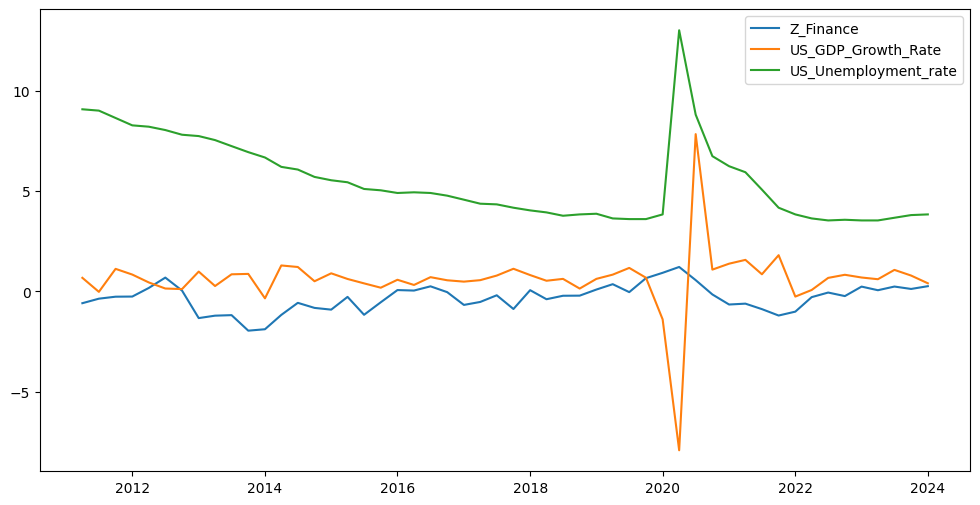

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df_full_common.index, df_full_common["Z_Finance"], label="Z_Finance")
plt.plot(df_full_common.index, df_full_common["US_GDP_Growth_Rate"], label="US_GDP_Growth_Rate")
plt.plot(df_full_common.index, df_full_common["US_Unemployment_rate"], label="US_Unemployment_rate")
plt.legend()
plt.show()

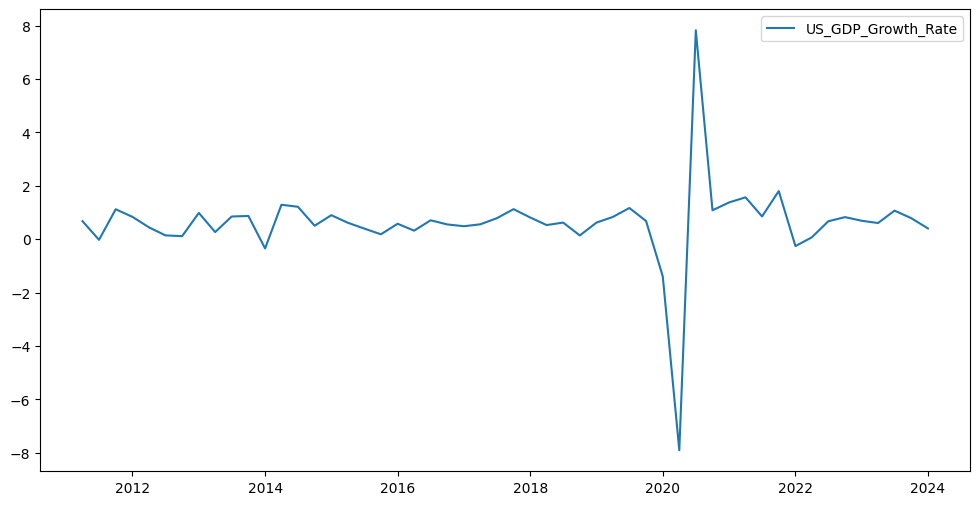

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df_full_common.index, df_full_common["US_GDP_Growth_Rate"], 
         label="US_GDP_Growth_Rate")
plt.legend()
plt.show()

In [18]:
# Tests de stationnarité sur les variables macroéconomiques

from statsmodels.tsa.stattools import adfuller, kpss

In [19]:
def print_stationarity_tests(df, variables):
    for varname in variables:
        print('-----')
        adf_test_statistic, adf_p_value, _, _, _, _ = adfuller(df[varname].dropna())
        kpss_test_statistic, kpss_p_value = kpss(df[varname].dropna(), regression='c')[:2]
        print(f"Variable: {varname}") 
        print(f"ADF test statistic: {adf_test_statistic} | p-value: {adf_p_value}"
        )
        print(f"KPSS test statistic: {kpss_test_statistic} | p-value: {kpss_p_value}")

In [20]:
variables = df_full_common.columns.tolist()
print_stationarity_tests(df_full_common, variables)

-----
Variable: EU_Central_bank_Intervention_rate_policy_interest_rate
ADF test statistic: -1.3819738315688164 | p-value: 0.5908869335863507
KPSS test statistic: 0.3058793162403443 | p-value: 0.1
-----
Variable: EU_Effective_exchange_rate
ADF test statistic: -1.6298278068612204 | p-value: 0.46758084734046296
KPSS test statistic: 0.8155223086578924 | p-value: 0.01
-----
Variable: EU_GDP_Growth_Rate
ADF test statistic: -9.277854041033942 | p-value: 1.2745751679065047e-15
KPSS test statistic: 0.1200311056382703 | p-value: 0.1
-----
Variable: EU_Long_term_interest_rate
ADF test statistic: -2.2195349731162826 | p-value: 0.19923193540422823
KPSS test statistic: 0.4047835177357774 | p-value: 0.0750933113207856
-----
Variable: EU_Unemployment_rate
ADF test statistic: -0.6184689137759007 | p-value: 0.866753962202701
KPSS test statistic: 1.0312001934732316 | p-value: 0.01
-----
Variable: US_Central_bank_Intervention_rate_policy_interest_rate
ADF test statistic: 0.10558285798351627 | p-value: 0.9

C:\Users\HP\AppData\Local\Temp\ipykernel_13576\3381325191.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_statistic, kpss_p_value = kpss(df[varname].dropna(), regression='c')[:2]
C:\Users\HP\AppData\Local\Temp\ipykernel_13576\3381325191.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_statistic, kpss_p_value = kpss(df[varname].dropna(), regression='c')[:2]
C:\Users\HP\AppData\Local\Temp\ipykernel_13576\3381325191.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_statistic, kpss_p_value = kpss(df[varname].dropna(), regression='c')[:2]
C:\Users\HP\AppData\Local\Temp\ipykernel_13576\33813

Variable: Z_Transport_and_info_com
ADF test statistic: -2.67323754884336 | p-value: 0.07878493290716015
KPSS test statistic: 0.15514599168685872 | p-value: 0.1


C:\Users\HP\AppData\Local\Temp\ipykernel_13576\3381325191.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_statistic, kpss_p_value = kpss(df[varname].dropna(), regression='c')[:2]


In [27]:
def stationarity_tests_table(df, variables):
    results = []

    for var in variables:
        series = df[var].dropna()

        # ADF
        adf_stat, adf_pvalue, _, _, _, _ = adfuller(series)

        # KPSS (regression='c' : stationnarité autour d'une constante)
        kpss_stat, kpss_pvalue, _, _ = kpss(series, regression="c")

        results.append({
            "variable": var,
            "adf_pvalue": adf_pvalue,
            "kpss_pvalue": kpss_pvalue
        })

    return pd.DataFrame(results)

In [28]:
stationarity_df = stationarity_tests_table(df_full_common, variables)
stationarity_df

C:\Users\HP\AppData\Local\Temp\ipykernel_13576\876847999.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_pvalue, _, _ = kpss(series, regression="c")
C:\Users\HP\AppData\Local\Temp\ipykernel_13576\876847999.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_pvalue, _, _ = kpss(series, regression="c")
C:\Users\HP\AppData\Local\Temp\ipykernel_13576\876847999.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_pvalue, _, _ = kpss(series, regression="c")
C:\Users\HP\AppData\Local\Temp\ipykernel_13576\876847999.py:11: InterpolationWarning: The test statistic is outside of th

,variable,adf_pvalue,kpss_pvalue
0,EU_Central_bank_Intervention_rate_policy_inter...,5.908869e-01,0.100000
1,EU_Effective_exchange_rate,4.675808e-01,0.010000
2,EU_GDP_Growth_Rate,1.274575e-15,0.100000
3,EU_Long_term_interest_rate,1.992319e-01,0.075093
4,EU_Unemployment_rate,8.667540e-01,0.010000
5,US_Central_bank_Intervention_rate_policy_inter...,9.664402e-01,0.024018
6,US_Effective_exchange_rate,6.542089e-01,0.010000
7,US_Equity_prices,9.970964e-01,0.010000
8,US_GDP_Growth_Rate,4.052873e-16,0.100000
9,US_House_prices_residential,9.989822e-01,0.010000


In [29]:
stationarity_df["ADF_stationary_5pct"] = stationarity_df["adf_pvalue"] < 0.05
stationarity_df["KPSS_stationary_5pct"] = stationarity_df["kpss_pvalue"] > 0.05

In [30]:
stationarity_df

,variable,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct
0,EU_Central_bank_Intervention_rate_policy_inter...,5.908869e-01,0.100000,False,True
1,EU_Effective_exchange_rate,4.675808e-01,0.010000,False,False
2,EU_GDP_Growth_Rate,1.274575e-15,0.100000,True,True
3,EU_Long_term_interest_rate,1.992319e-01,0.075093,False,True
4,EU_Unemployment_rate,8.667540e-01,0.010000,False,False
5,US_Central_bank_Intervention_rate_policy_inter...,9.664402e-01,0.024018,False,False
6,US_Effective_exchange_rate,6.542089e-01,0.010000,False,False
7,US_Equity_prices,9.970964e-01,0.010000,False,False
8,US_GDP_Growth_Rate,4.052873e-16,0.100000,True,True
9,US_House_prices_residential,9.989822e-01,0.010000,False,False


In [31]:
def stationarity_diagnosis(row):
    if row["ADF_stationary_5pct"] and row["KPSS_stationary_5pct"]:
        return "Stationary"
    elif (not row["ADF_stationary_5pct"]) and (not row["KPSS_stationary_5pct"]):
        return "Non-stationary"
    else:
        return "Ambiguous"

stationarity_df["diagnosis"] = stationarity_df.apply(stationarity_diagnosis, axis=1)


In [32]:
stationarity_df

,variable,adf_pvalue,kpss_pvalue,ADF_stationary_5pct,KPSS_stationary_5pct,diagnosis
0,EU_Central_bank_Intervention_rate_policy_inter...,5.908869e-01,0.100000,False,True,Ambiguous
1,EU_Effective_exchange_rate,4.675808e-01,0.010000,False,False,Non-stationary
2,EU_GDP_Growth_Rate,1.274575e-15,0.100000,True,True,Stationary
3,EU_Long_term_interest_rate,1.992319e-01,0.075093,False,True,Ambiguous
4,EU_Unemployment_rate,8.667540e-01,0.010000,False,False,Non-stationary
5,US_Central_bank_Intervention_rate_policy_inter...,9.664402e-01,0.024018,False,False,Non-stationary
6,US_Effective_exchange_rate,6.542089e-01,0.010000,False,False,Non-stationary
7,US_Equity_prices,9.970964e-01,0.010000,False,False,Non-stationary
8,US_GDP_Growth_Rate,4.052873e-16,0.100000,True,True,Stationary
9,US_House_prices_residential,9.989822e-01,0.010000,False,False,Non-stationary


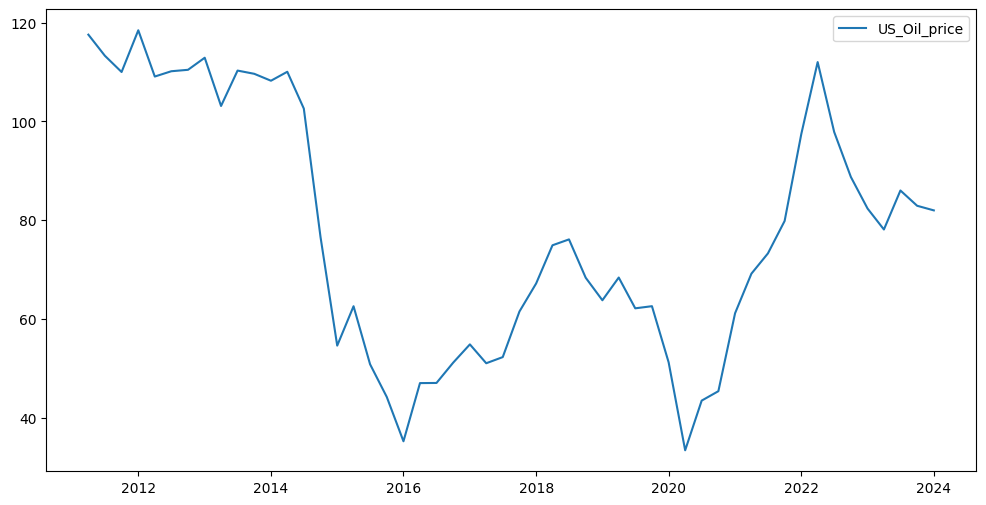

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df_full_common.index, df_full_common["US_Oil_price"], 
         label="US_Oil_price")
plt.legend()
plt.show()